# Assignment_Group1

## Processing the raw data

In [1]:
import pandas as pd
import numpy as np
import math 

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import model_selection
import statsmodels.api as sm
import statsmodels.formula.api as smf # Ming: Regression formula

import scipy.stats as stats
import matplotlib
from matplotlib import pyplot as plt # for plotting
from matplotlib.collections import EllipseCollection # for correlation matrix
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
!gdown https://drive.google.com/uc?id=1tiaMg-vd_gE8qt3J4_rIB4U2DzH-exCg

Downloading...
From: https://drive.google.com/uc?id=1tiaMg-vd_gE8qt3J4_rIB4U2DzH-exCg
To: /content/bankrevenue.csv
100% 305k/305k [00:00<00:00, 102MB/s]


In [3]:
raw_data = pd.read_csv("bankrevenue.csv") 
raw_data.describe()

,Rev_Total,Bal_Total,Offer,AGE,CHQ,CARD,SAV1,LOAN,MORT,INSUR,PENS,Check,CD,MM,Savings,AccountAge
count,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000
mean,2.164555,9232.247379,0.547574,47.201078,0.507412,0.506334,0.187466,0.111590,0.370620,0.303235,0.520216,0.778437,0.111590,0.303235,0.303235,7.005526
std,3.207264,16293.006346,0.497765,21.061364,0.499979,0.499994,0.390312,0.314883,0.483003,0.459687,0.499625,0.415327,0.314883,0.459687,0.459687,4.570644
min,0.010000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450000,42.935000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
50%,1.175000,1117.965000,1.000000,46.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000
75%,2.622500,11248.500000,1.000000,62.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000
max,94.100000,166461.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000


In [ ]:
raw_data.describe()
# 4 numeric: Rev_Total, Bal_Total, AGE, AccountAge
# 12 binary: Offer, CHQ, CARD, SAV1, LOAN, MORT, INSUR, PENS, Check, CD, MM, Savings

,Rev_Total,Bal_Total,Offer,AGE,CHQ,CARD,SAV1,LOAN,MORT,INSUR,PENS,Check,CD,MM,Savings,AccountAge
count,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000,7420.000000
mean,2.164555,9232.247379,0.547574,47.201078,0.507412,0.506334,0.187466,0.111590,0.370620,0.303235,0.520216,0.778437,0.111590,0.303235,0.303235,7.005526
std,3.207264,16293.006346,0.497765,21.061364,0.499979,0.499994,0.390312,0.314883,0.483003,0.459687,0.499625,0.415327,0.314883,0.459687,0.459687,4.570644
min,0.010000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450000,42.935000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
50%,1.175000,1117.965000,1.000000,46.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000
75%,2.622500,11248.500000,1.000000,62.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000
max,94.100000,166461.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000


In [ ]:
raw_data.isnull().sum()

Rev_Total     0
Bal_Total     0
Offer         0
AGE           0
CHQ           0
CARD          0
SAV1          0
LOAN          0
MORT          0
INSUR         0
PENS          0
Check         0
CD            0
MM            0
Savings       0
AccountAge    0
dtype: int64

## Split data & Transformation
1. Split the dataset on training (the first 6000 observations) and testing (the reminding observations) sets.
2. Take log transformation on the Total Revenue and take it as the response variable.

In [ ]:
# Transformation
data = raw_data.copy()
data['Rev_Total'] = data['Rev_Total'].apply(lambda x: math.log(x)) 
data.rename(columns={'Rev_Total':'Log_Rev_Total'},inplace=True)

In [ ]:
data.head()

,Log_Rev_Total,Bal_Total,Offer,AGE,CHQ,CARD,SAV1,LOAN,MORT,INSUR,PENS,Check,CD,MM,Savings,AccountAge
0,-0.371064,18000.00,0,34,0,0,0,0,1,0,1,1,0,0,0,4
1,0.989541,59140.00,0,28,1,0,1,0,1,0,1,1,0,0,0,5
2,-1.897120,3.33,0,30,1,0,1,0,0,1,1,0,0,1,1,5
3,0.678034,1126.00,0,29,1,0,0,1,0,0,1,0,1,0,0,4
4,-0.301105,1718.28,0,38,1,1,0,1,1,1,0,1,1,1,1,9


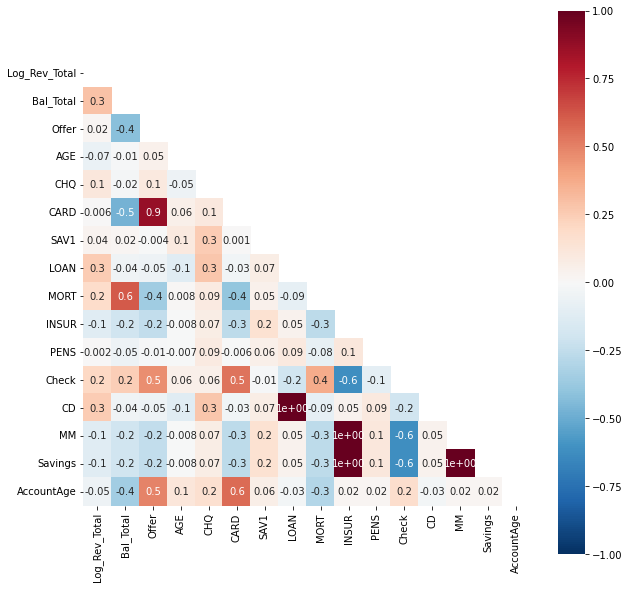

In [ ]:
# Check whether correlation matrix is correct.
data_corr=pd.DataFrame(data.corr())

plt.figure(figsize=(10, 10))
mask = np.zeros_like(data_corr)
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
mask[np.triu_indices_from(mask)] = True #mask the numbers in upper triangle
sns.heatmap(data=data_corr, mask=mask, square=True, cmap="RdBu_r", 
            norm = norm, annot = True,  fmt ='.01') 

1. High correlation pairs: Bal_Total&MORT: 0.612; Offer&CARD: 0.870; CARD&Check; CARD&AccountAge; INSUR&Check; Check&MM; Check&Savings
2. log(Toal Revenue) is not highly correlated with any predictors.

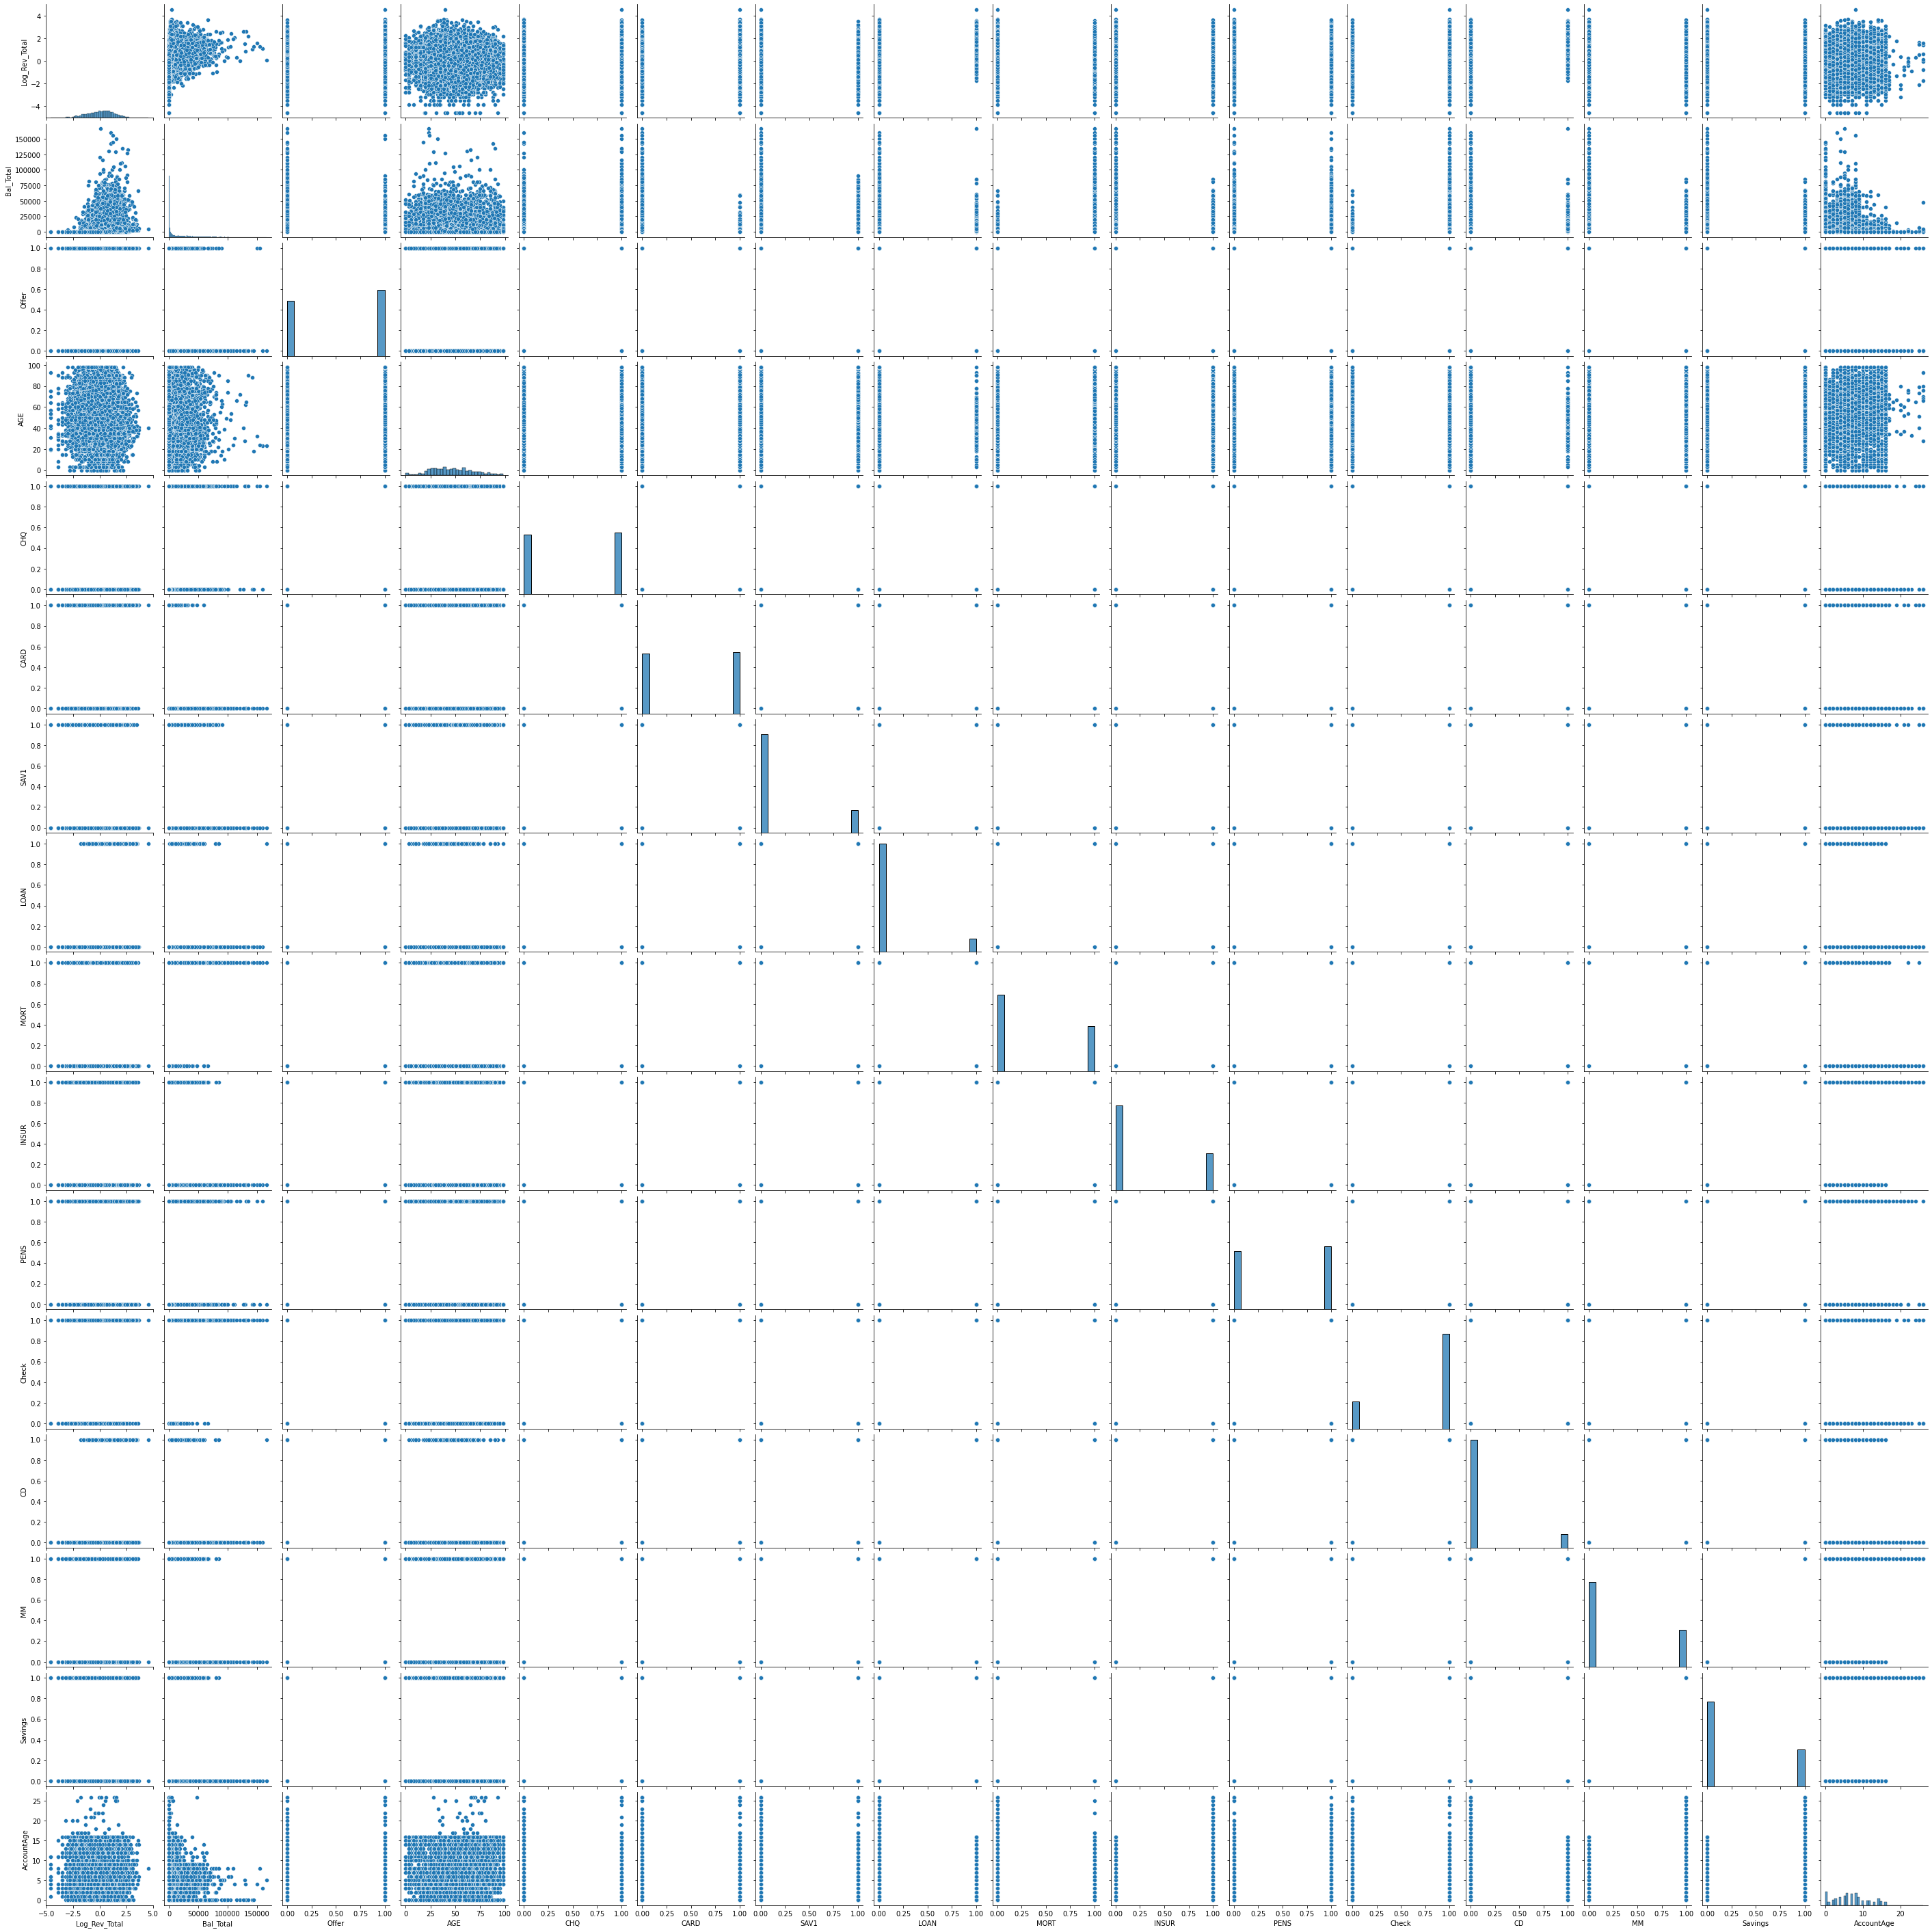

In [ ]:
sns.pairplot(data)

In [ ]:
# Split
df_train = data.iloc[:6000,:]
df_test = data.iloc[6000:,:]

## Modelling
3. By using the training data, do the following

### Model.1 regression model on log(Total Revenue)
3.1. Fit a regression model on log(Total Revenue) by using all predictors and report the resulting model. You will find some estimates to be NA or warning message like ‘singular matrix’ (depends on which software you are using), try to figure out the reason behind. (Hints: Using correlation). Propose a possible solution and keep using this solution all the way.


In [ ]:
model = sm.OLS(df_train['Log_Rev_Total'], sm.add_constant(df_train.iloc[:,1:]))
reg1 = model.fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Rev_Total   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     143.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          1.90e-317
Time:                        04:18:37   Log-Likelihood:                -9181.3
No. Observations:                6000   AIC:                         1.839e+04
Df Residuals:                    5987   BIC:                         1.848e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8525      0.062    -13.772      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Model.2 Refit
3.2. Refit the model again using the solution of above.
* Check for model assumption
* Test For multicollinearity
* Inference
1. Overall Model
2. Indevidual Coefficient


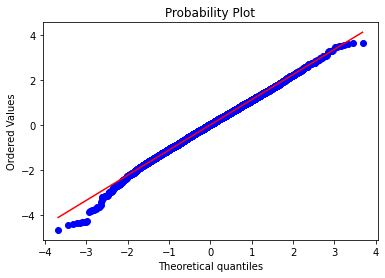

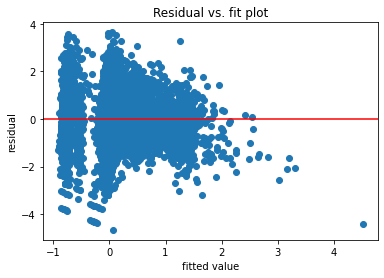

In [ ]:
#Check for model assumption
stats.probplot(reg1.resid, dist="norm", plot=plt)
plt.show()

plt.scatter(reg1.fittedvalues,reg1.resid)
plt.axhline(y=0, color="red")
plt.title("Residual vs. fit plot")
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.show()
# the variance of residual may not be the same for different fitted value

In [ ]:
data2 = raw_data.copy()

(array([5.906e+03, 8.100e+02, 4.550e+02, 1.720e+02, 4.400e+01, 1.300e+01,
        8.000e+00, 5.000e+00, 3.000e+00, 4.000e+00]),
 array([3.00000000e-02, 1.66461270e+04, 3.32922240e+04, 4.99383210e+04,
        6.65844180e+04, 8.32305150e+04, 9.98766120e+04, 1.16522709e+05,
        1.33168806e+05, 1.49814903e+05, 1.66461000e+05]),
 <a list of 10 Patch objects>)

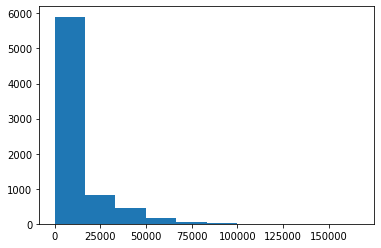

In [ ]:
plt.hist(data2['Bal_Total'])
#plt.hist(data2['Rev_Total'])

From the distribution of 'Bal_Total', we try to take log transformation.

In [ ]:
data2['Rev_Total'] = data2['Rev_Total'].apply(lambda x: math.log(x))
data2['Bal_Total'] = data2['Bal_Total'].apply(lambda x: math.log(x)) 
data2.rename(columns={'Rev_Total':'Log_Rev_Total'},inplace=True)
data2.rename(columns={'Bal_Total':'Log_Bal_Total'},inplace=True)

In [ ]:
data2.head()

,Log_Rev_Total,Log_Bal_Total,Offer,AGE,CHQ,CARD,SAV1,LOAN,MORT,INSUR,PENS,Check,CD,MM,Savings,AccountAge
0,-0.371064,9.798127,0,34,0,0,0,0,1,0,1,1,0,0,0,4
1,0.989541,10.987663,0,28,1,0,1,0,1,0,1,1,0,0,0,5
2,-1.897120,1.202972,0,30,1,0,1,0,0,1,1,0,0,1,1,5
3,0.678034,7.026427,0,29,1,0,0,1,0,0,1,0,1,0,0,4
4,-0.301105,7.449079,0,38,1,1,0,1,1,1,0,1,1,1,1,9


(array([   6.,   27.,  109., 1032.,  895.,  843., 1071., 1236., 1587.,
         614.]),
 array([-3.5065579 , -1.95365047, -0.40074305,  1.15216437,  2.70507179,
         4.25797921,  5.81088664,  7.36379406,  8.91670148, 10.4696089 ,
        12.02251633]),
 <a list of 10 Patch objects>)

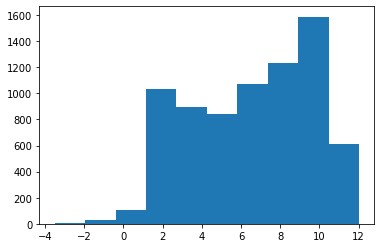

In [ ]:
plt.hist(data2['Log_Bal_Total'])

It seems more balanced.

In [ ]:
df_train2 = data2.iloc[:6000,:]
df_test2 = data2.iloc[6000:,:]

In [ ]:
model = sm.OLS(df_train2['Log_Rev_Total'], sm.add_constant(df_train2.iloc[:,1:]))
regression1 = model.fit()
print (regression1.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Rev_Total   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     724.9
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:19:00   Log-Likelihood:                -7248.2
No. Observations:                6000   AIC:                         1.452e+04
Df Residuals:                    5987   BIC:                         1.461e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.6138      0.050    -51.947

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


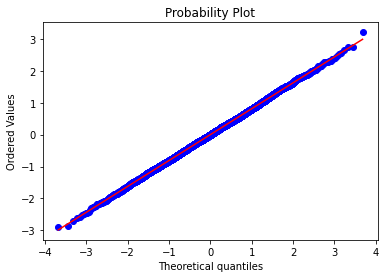

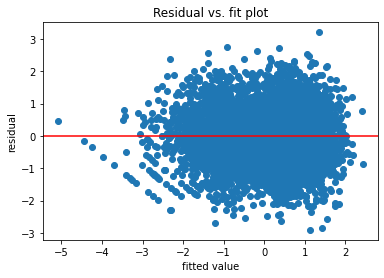

In [ ]:
#Check for model assumption
stats.probplot(regression1.resid, dist="norm", plot=plt)
plt.show()

plt.scatter(regression1.fittedvalues,regression1.resid)
plt.axhline(y=0, color="red")
plt.title("Residual vs. fit plot")
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.show()

In [ ]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

df_train_red2 = df_train2.drop(columns = ['Log_Rev_Total'])
print ('VIF for all variables')
vif_cal(df_train2[df_train_red2.columns[:]])

VIF for all variables
Log_Bal_Total  VIF =  2.89
Offer  VIF =  3.39
AGE  VIF =  1.06
CHQ  VIF =  1.27
CARD  VIF =  8.55
SAV1  VIF =  1.1
LOAN  VIF =  inf
MORT  VIF =  3.46
INSUR  VIF =  inf
PENS  VIF =  1.04
Check  VIF =  7.49
CD  VIF =  inf
MM  VIF =  inf
Savings  VIF =  inf
AccountAge  VIF =  1.52


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


A general method is to delete when VIF > 10

should delete some of **LOAN, INSUR, CD, MM, Savings** as their VIF = inf

1. LOAN and CD
2. INSUR and MM and Savings

are highly correlatied, maybe try deleting **CD, INSUR and MM**

In [ ]:
# Drop: multicollinearity
model = sm.OLS(df_train2['Log_Rev_Total'], sm.add_constant(df_train_red2.drop(columns = ['CD', 'INSUR', 'MM'])))
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Rev_Total   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     724.9
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:19:12   Log-Likelihood:                -7248.2
No. Observations:                6000   AIC:                         1.452e+04
Df Residuals:                    5987   BIC:                         1.461e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.6138      0.050    -51.947

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Drop: non-significance
model = sm.OLS(df_train2['Log_Rev_Total'], sm.add_constant(df_train_red2.drop(columns = ['AGE', 'CHQ', 'SAV1', 'PENS', 'Savings', 'AccountAge', 'CD', 'INSUR', 'MM'])))
reg2 = model.fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Rev_Total   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1449.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:31:48   Log-Likelihood:                -7251.0
No. Observations:                6000   AIC:                         1.452e+04
Df Residuals:                    5993   BIC:                         1.456e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.6854      0.033    -81.304

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Partial F test
SSE_r = reg2.mse_resid * 6000
SSE_f = reg.mse_resid * 6000
F_partial = (SSE_r-SSE_f)*(6000-12-1)/6/SSE_f
print(F_partial > stats.f.ppf(0.95,dfn=6,dfd=6000-12-1)) 
# cannot reject H0: the coef of non-sig variables are all zeros

False


### Model.3 forward selection with AIC
3.3. Using forward selection with AIC to select predictors. Report the
selected predictors and their estimated coefficients.


In [ ]:
import statsmodels.formula.api as smf
import functools
import re

def reduce_concat(x, sep=""):
    return functools.reduce(lambda x, y: str(x) + sep + str(y), x)


def forward_selected(data,null_formula,full_formula,response,intercept):
    """Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by aic
    """

    
    null_temp        = re.split('~',null_formula)
    null_predic_com  = null_temp[1].split('+')
    null_predic      = null_predic_com[0:len(null_predic_com)]
    full_temp        = re.split('~',full_formula)
    full_predic_com  = full_temp[1].split('+')
    full_predic      = full_predic_com[0:len(full_predic_com)]
    indices          = [i for i,id in enumerate(full_predic) if id not in null_predic]
    domain           = [full_predic[i] for i in indices]

    start            = set(null_predic)
    remaining        = set(domain)
    selected         = null_predic
    current_score, best_new_score = 10000000, 10000000
    score_aic        = []
    variable_added   = []
    flag=0
    step=np.max(indices)+1
    
    while (remaining and current_score == best_new_score and step >0):
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,' + '.join(selected + [candidate]))

            if intercept ==0:
                formula = formula + "-1"
            score = smf.ols(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            score_aic.append(best_new_score)
            variable_added.append(best_candidate)
            current_score = best_new_score
        step=step-1
    formula = "{} ~ {}".format(response,' + '.join(selected))

    if intercept ==0:
        formula = formula + "-1"
    model =smf.ols(formula, data).fit()
    return model

In [ ]:
all_columns = "+".join(df_train2.columns[1:])
my_formula="Log_Rev_Total~"+all_columns
forward_var=forward_selected(data=df_train2,null_formula='Log_Rev_Total~1',full_formula=my_formula,response='Log_Rev_Total',intercept=1)
forward_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Log_Rev_Total   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1243.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:19:39   Log-Likelihood:                -7249.2
No. Observations:                6000   AIC:                         1.451e+04
Df Residuals:                    5992   BIC:                         1.457e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.6376      0.041    -63.957      0.000      -2.718      -2.557
Log_Bal_Total     0.4479      0.006     77.202      0.000       0.437       0.459
CARD              1.5731      0.059     26.568      0.000       1.457       1.689
Check            -1.3573      0.064    -21.229      0.000      -1.483      -1.232
Offer             0.1380      0.039      3.566      0.000       0.062       0.214
CD               -0.1402      0.038     -3.662      0.000      -0.215      -0.065
MORT             -0.0789      0.038     -2.051      0.040      -0.154      -0.003
INSUR            -0.0581      0.030     -1.935      0.053      -0.117       0.001
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.321
Skew:                           0.017   Prob(JB):                        0.852
Kurtosis:                       3.011   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model.4 PCR
3.4. Using PCR to perform reduction by considering:
Able to explain at least 90% of the variation
Relatively low MSE (from cross-validation)


3.4.1 explain at least 90% of the variation

In [ ]:
pca = PCA()
X_reduced = pca.fit_transform(scale(df_train2[df_train2.columns[1:]]))
print("Comp1 to Comp8 Var. Expalined.: ",np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[:8])
# returns the percentage of variation explained by the each components  

Comp1 to Comp8 Var. Expalined.:  [27.33 45.84 61.   70.07 76.62 82.94 88.16 92.46]


As in this case, we want to find the components that explain at least 90% of the variation.

Due to the output result, we can see that up to component 7, we can explain around 88.16% of variance, and add component 8 we can get 92.46%, which is greater than 90%, thus we pick component 1 to component 8 sa our result.

In [ ]:
pca.components_[:8]

array([[-0.20959249, -0.12629186, -0.02541221,  0.01244875, -0.13211814,
         0.05733127,  0.08603718, -0.26153781,  0.46738149,  0.09856766,
        -0.40956529,  0.08603718,  0.46738149,  0.46738149,  0.05075453],
       [ 0.37095561, -0.48984813, -0.03918292, -0.1818984 , -0.52463666,
        -0.06022618, -0.13570678,  0.32288678,  0.02520288, -0.0449021 ,
        -0.11684474, -0.13570678,  0.02520288,  0.02520288, -0.38766561],
       [ 0.09916273, -0.12885673, -0.17558419,  0.27090198, -0.11995422,
         0.06052865,  0.62771445,  0.06112018, -0.10848877,  0.09309816,
        -0.0807821 ,  0.62771445, -0.10848877, -0.10848877, -0.09488566],
       [ 0.25265242, -0.01943334,  0.25118182,  0.46653588, -0.00710918,
         0.59452688, -0.07731405,  0.34845595,  0.13248684,  0.12424589,
         0.21771819, -0.07731405,  0.13248684,  0.13248684,  0.22946742],
       [-0.06370376, -0.07306669,  0.80091422, -0.27768858, -0.05543235,
         0.16046577,  0.16868792, -0.09122379, 

In [ ]:
num_comp = 8
pcr_model = sm.OLS(df_train2['Log_Rev_Total'], sm.add_constant(X_reduced[:,:num_comp]))
results = pcr_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Rev_Total   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     401.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:46:40   Log-Likelihood:                -8651.9
No. Observations:                6000   AIC:                         1.732e+04
Df Residuals:                    5991   BIC:                         1.738e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.013      6.477      0.0

3.4.2 Relatively low MSE  (from cross-validation)(10 folds)

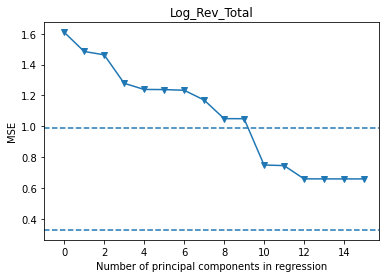

In [ ]:
# 10-fold CV, with shuffle
import statistics
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True)
y = df_train2['Log_Rev_Total']
regr = LinearRegression()

mse = []
# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
# Calculate MSE using CV for the 16 principle components, adding one component at the time.
for i in np.arange(1, 16):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Log_Rev_Total')
plt.xlim(xmin=-1)
plt.axhline(y=min(mse)+np.std(mse, ddof = 1), linestyle='--')
plt.axhline(y=min(mse)-np.std(mse, ddof = 1), linestyle='--')
plt.show()

In [ ]:
min(mse) == mse[14]

True

12 components has the total minimum MSE in this case, it explains around 99.99% variation

In [ ]:
num_comp = 14
pcr_model = sm.OLS(df_train2['Log_Rev_Total'], sm.add_constant(X_reduced[:,:num_comp]))
results = pcr_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Rev_Total   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     724.9
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:48:07   Log-Likelihood:                -7248.2
No. Observations:                6000   AIC:                         1.452e+04
Df Residuals:                    5987   BIC:                         1.461e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.010      8.181      0.0

So above all, first condition fit 8 comps, and second condition fit 10 comps.

### Model.5 LASSO
3.5. Apply LASSO to pick a model with 4 predictors. (with 8-folds for the cross-validation)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.198e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.183e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.176e-04, with an active set of 7 regressors, and the smallest cholesky pivot element 

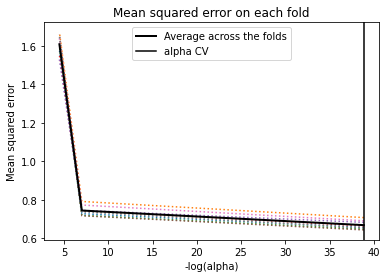

alpha:0.00000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


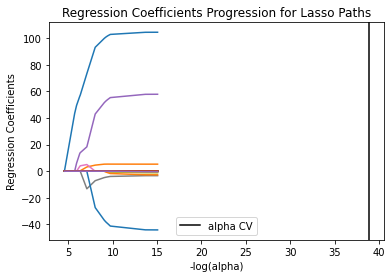

In [ ]:
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import KFold
import matplotlib.pylab as plt

lasso_full_sol=LassoLarsCV(cv=KFold(n_splits=8,shuffle=True),max_n_alphas =2,normalize=True).fit(df_train2[df_train2.columns[1:]].values,df_train2['Log_Rev_Total'].values)

m_log_alphascv = -np.log(lasso_full_sol.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, lasso_full_sol.mse_path_, ':')
plt.plot(m_log_alphascv, lasso_full_sol.mse_path_.mean(axis=-1), 'k',
label='Average across the folds', linewidth=2)
plt.axvline(-np.log(lasso_full_sol.alpha_), linestyle='-', color='k',
label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

print ("alpha:%.5f"  % lasso_full_sol.alpha_)


m_log_alphas = -np.log(lasso_full_sol.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, lasso_full_sol.coef_path_.T)
plt.axvline(-np.log(lasso_full_sol.alpha_), linestyle='-', color='k',
label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.legend()
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


aplha:0.00176


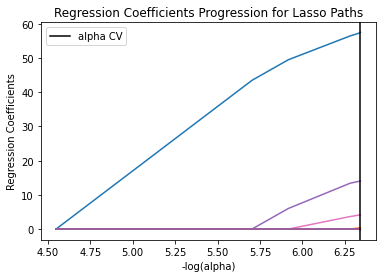

In [ ]:
from sklearn.linear_model import LassoLars
lasso_fit=LassoLars(alpha=np.exp(-6.342)).fit(df_train2[df_train2.columns[1:]].values,df_train2['Log_Rev_Total'].values)

print ("aplha:%.5f" % lasso_fit.alpha)

m_log_alphas = -np.log(lasso_fit.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, lasso_fit.coef_path_.T)
plt.axvline(-np.log(lasso_fit.alpha), linestyle='-', color='k',label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.legend()
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

In [ ]:
# the coefficients of 'Offer' and 'MORT' decrease to zero almost at the same time
# it is hard to distinct when the coefficient of 'Offer' reduces to zero and when the coefficient of 'MORT' reduces to zero 
pd.DataFrame(data = {'predictors':list(df_train2.columns[1:]),'coefficients':lasso_fit.coef_})

,predictors,coefficients
0,Log_Bal_Total,0.242940
1,Offer,0.010440
2,AGE,0.000000
3,CHQ,0.000000
4,CARD,0.370496
5,SAV1,0.000000
6,LOAN,0.160823
7,MORT,-0.006329
8,INSUR,0.000000
9,PENS,0.000000


## MSE & Rebuild Model
4. Compute the predictive MSE for all models above (expect Model.1) by using the testing data. Based on selected predictors from the minimum MSE model, rebuild a multiple regression model with the full dataset using least square fit (Model.6). [Note: In case, Model.4 is the minimum MSE model, then use the second minimum MSE to build Model.6.]


### MSE

In [ ]:
# MSE.Model2
log_mse_model2 = mean_squared_error(df_test2['Log_Rev_Total'], 
                                    reg2.predict(sm.add_constant(df_test2[['Log_Bal_Total', 'Offer', 'CARD', 'LOAN', 'Check', 'MORT']])))
print ('MSE.refit: %.5f'% log_mse_model2)

# MSE.forward
log_mse_forward = mean_squared_error(df_test2['Log_Rev_Total'], forward_var.predict(df_test2[df_test2.columns[1:16]]))
print ('MSE.forward: %.5f'% log_mse_forward)

# MSE of PCR (90% var)
num_comp = 8
X_reduced_test = pca.transform(scale(df_test2[df_test2.columns[1:]]))[:,:num_comp]
regr = LinearRegression()
regr.fit(X_reduced[:,:num_comp], y)
pred = regr.predict(X_reduced_test)
mse_pcr_1=mean_squared_error(df_test2['Log_Rev_Total'], pred)
print ('MSE.pcr (90pc var): %.5f'% mse_pcr_1)

# MSE of PCR (relatively min MSE)
num_comp = 12
X_reduced_test = pca.transform(scale(df_test[df_test.columns[1:]]))[:,:num_comp]
regr = LinearRegression()
regr.fit(X_reduced[:,:num_comp], y)
pred = regr.predict(X_reduced_test)
mse_pcr_2=mean_squared_error(df_test['Log_Rev_Total'], pred)
print ('MSE.pcr (relatively min MSE): %.5f'% mse_pcr_2)

# MSE.lasso
log_mse_lasso = mean_squared_error(df_test2['Log_Rev_Total'], lasso_fit.predict(df_test2[df_test2.columns[1:]]))
print ('MSE.lasso: %.5f'% log_mse_lasso)

MSE.refit: 2.03095
MSE.forward: 0.65859
MSE.pcr (90pc var): 1.45475
MSE.pcr (relatively min MSE): 1.67475
MSE.lasso: 0.84704


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LassoLars was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Linear regression with forward selection has the minimum MSE in this test set.

### Rebuild Model

In [ ]:
model6 = sm.OLS(data2['Log_Rev_Total'], sm.add_constant(data2[['Log_Bal_Total', 'CD', 'Check', 'Offer', 'INSUR', 'MORT', 'CARD']]))
results = model6.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Rev_Total   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1580.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:35:16   Log-Likelihood:                -8965.0
No. Observations:                7420   AIC:                         1.795e+04
Df Residuals:                    7412   BIC:                         1.800e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.6042      0.037    -70.773

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Prediction
5. By Model.6, predict the Total Revenue for a typical non-active customer e.g. average in every numerical predictor and 0 for all indicator predictors.

In [ ]:
bal= data["Bal_Total"].mean()

In [ ]:
Non_act_customer = [1,np.log(bal),0,0,0,0,0,0]
print(Non_act_customer)

[1, 9.130457784175947, 0, 0, 0, 0, 0, 0]


In [ ]:
np.exp(results.predict(Non_act_customer))

array([4.20135073])